## Importing relevant modules and data

In [1]:
#Importing all of the modules that I need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Assign a source to a variable
dataset = "C:/Users/Hasan/Downloads/TMDB_movies.csv"

## Create a dataframe called df and read in the csv from the web
df = pd.read_csv(dataset)

In [70]:
df.head()

#Maybe focus on genres, possibly original_language, popularity, possibly release_date, revenue, vote_average, vote_count

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"Action,Adventure,Fantasy,Science Fiction"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"Adventure,Fantasy,Action"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"Action,Adventure,Crime"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"Action,Crime,Drama,Thriller"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"Action,Adventure,Science Fiction"


## Correcting the format
### Turning the dates into datetime format instead of objects

In [87]:
df.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
genre_names              object
dtype: object

In [95]:
#Changing the data type for release_date to datetime format

df['release_date'] = pd.to_datetime(df['release_date'])

In [94]:
df.dtypes;

## Cleaning up the genres column
#### Turning it into a list of strings, without the keys 

In [16]:
df['genres'][0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [124]:
#Extracting the values of the genres and putting them in a new column as a list of genres

import ast

def extract_genres(movie):
    ''' Take a single movie's genres and make them into a comma separated string '''
    movie = ast.literal_eval(movie) ## make sure it's a list!
    
    genres = [x['name'] for x in movie] ## Get a list of all names
    
    return genres

#Citation: modification of code from Alex

#create a new column called genre_names to apply this function to
df['genre_names'] = df.genres.apply(extract_genres)

In [153]:
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Adventure, Fantasy, Action]"


## Doing Null Checks

In [10]:
#3091 nulls in homepage
#3 nulls in overview
#1 nulls in release_date
#2 nulls runtime
#844 nulls in tagline

null_df = df.isnull()
null_df.sum();

### Filling in the Missing Completely At Random Nulls

In [24]:
#Filling homepage nulls with "No Link Available"
df["homepage"].fillna("No Link Available", inplace = True)

In [154]:
#Filling tagline nulls with "No Tagline Available"
df["tagline"].fillna("No Tagline Available", inplace = True)

In [31]:
#Finding rows with nulls
df[df.isnull().any(axis = 1)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",No Link Available,370980,"[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...",it,Chiamatemi Francesco - Il Papa della gente,NaN,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,No Link Available,Chiamatemi Francesco - Il Papa della gente,7.3,12
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",No Link Available,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,No Link Available,"To Be Frank, Sinatra at 100",0.0,0
4431,913000,"[{""id"": 99, ""name"": ""Documentary""}]",No Link Available,292539,[],de,Food Chains,NaN,0.795698,[],[],2014-04-26,0,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,No Link Available,Food Chains,7.4,8
4553,0,[],No Link Available,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.000000,[],[],NaN,0,0.0,[],Released,No Link Available,America Is Still the Place,0.0,0


In [65]:
#dropping other nulls because the entire row was full of nulls.

df.dropna(
    axis = 0,
    how = 'any', 
    subset = ['overview', 'runtime', 'release_date'],  
    inplace = True
)

In [66]:
#Trying to get a better look at the data through statistics.
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.799000e+03,4799.000000,4799.000000,4.799000e+03,4799.000000,4799.000000,4799.000000
mean,2.906593e+07,56899.920192,21.509884,8.232920e+07,106.903105,6.094186,690.789123
std,4.073251e+07,88236.500208,31.824074,1.629076e+08,22.561305,1.188340,1234.941795
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.500000,4.685547,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.000000,12.929525,1.918402e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58461.500000,28.350728,9.295652e+07,118.000000,6.800000,737.500000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Analysing the relationship between different columns

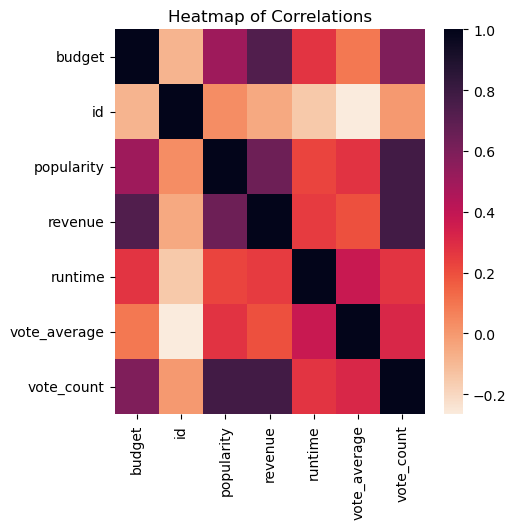

In [67]:
#Making a heat map of correlations between the different columns

plt.figure(figsize = (5,5))
sns.heatmap(df.corr(numeric_only = True),
           cmap = 'rocket_r')

plt.title('Heatmap of Correlations') 
plt.show()

#### budget seems to have a strong correlation with vote_count, revenue and popularity. However, the vote count being correlated with the budget runs in contrast to there being a very weak correlation between budget and vote_average. 
##### - A movie having a high budget does not mean it will be received well.

### A correlation coefficient of 0.731 shows a strong correlation between budget and revenue.

In [68]:
#Correlation between budget and revenue

budget_revenue_correlation = df["budget"].corr(df["revenue"])
print(budget_revenue_correlation)

0.7307642428927212


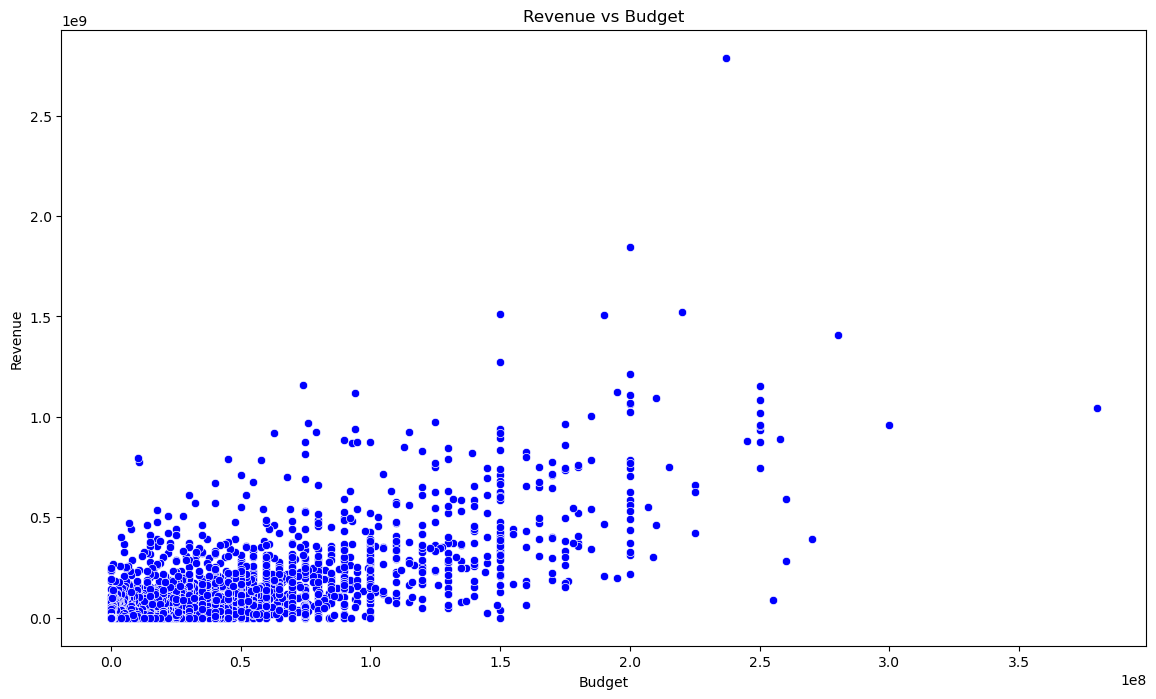

In [130]:
#Graph of Budget vs Revenue
#Didn't use this in the presentation

# Plot revenue against budget
plt.figure(figsize=(14, 8))
sns.scatterplot(x='budget', y='revenue', data=df, color='blue')
plt.title('Revenue vs Budget')
plt.xlabel('Budget')
plt.ylabel('Revenue')
#plt.xlimit
#plt.ylimit
plt.show()

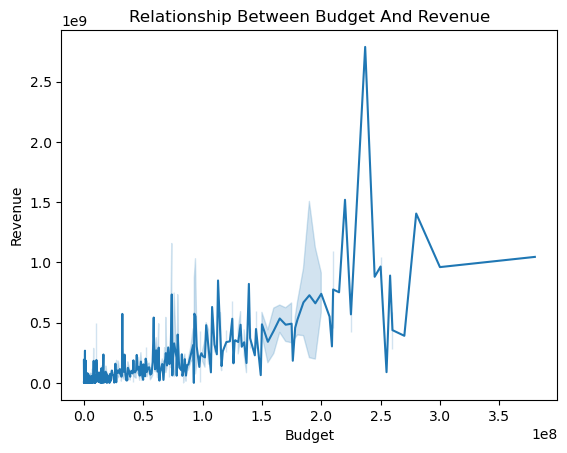

In [128]:
#Line plot showing relationship between budget and revenue   
sns.lineplot(data = df, x = 'budget', y = 'revenue')
plt.title('Relationship Between Budget And Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

#### This could be explained by the amount of budget being less relevant to the revenue generated after a certain point

In [134]:
#Regression plot of budget's relationship with 'revenue'
#Ignore

#sns.regplot(data = df, x = 'budget', y  = 'revenue')
#plt.title('Relationship Between Budget And Revenue')
#plt.xlabel('Budget')
#plt.ylabel('Revenue')
#plt.show()

## The movie with the highest budget but lowest revenue 
### 'The Lone Ranger' 

In [132]:
#Movie with the highest budget but lowest revenue
#It has a vote_average of 5.9, so it was not well received

df.loc[(df["budget"]-df["revenue"])==max(df["budget"]-df["revenue"])]
#The maximum difference between budget and revenue

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
13,255000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://disney.go.com/the-lone-ranger/,57201,"[{""id"": 1556, ""name"": ""texas""}, {""id"": 2673, ""...",en,The Lone Ranger,The Texas Rangers chase down a gang of outlaws...,49.046956,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2013-07-03,89289910,149.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Never Take Off the Mask,The Lone Ranger,5.9,2311,"[Action, Adventure, Western]"


### This can be explained by its average rating (vote_average) being 5.9.

### The movie with the lowest difference between budget and revenue, Avatar, had a smaller budget than The Lone Ranger and higher vote_average

In [135]:
#Movie with the lowest diffference between budget and revenue
df.loc[(df["budget"]-df["revenue"])==min(df["budget"]-df["revenue"])]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,genre_names
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Action, Adventure, Fantasy, Science Fiction]"


## Analysing which genres are the highest/lowest grossing

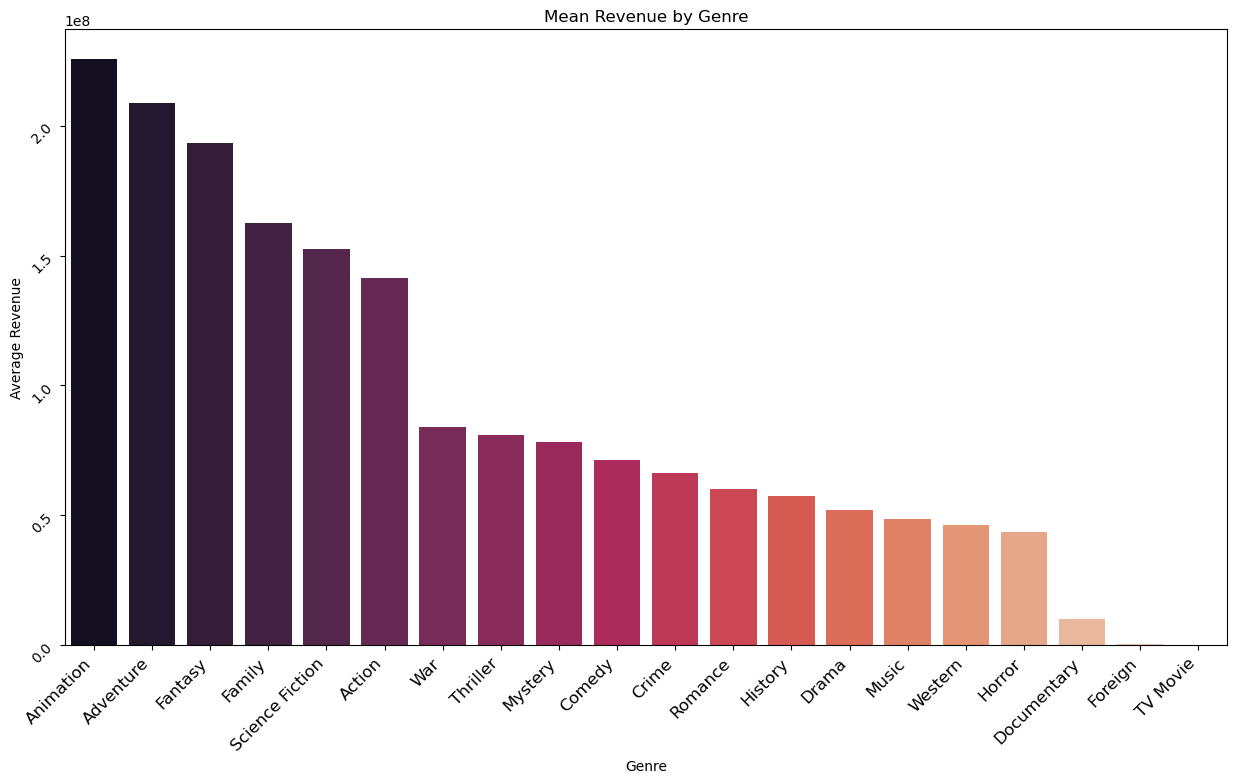

In [145]:
#Analysing revenue by genre
genres_revenue = df[['genre_names', 'revenue']].copy()

# Explode the 'genre_names' column to have one row for each genre
exploded_genres_revenue = genres_revenue.explode('genre_names')

# Group data by 'genre_names' and calculate mean revenue for each individual genre
groupby_genre = exploded_genres_revenue.groupby('genre_names')['revenue'].mean().reset_index()

groupby_genre = groupby_genre.sort_values(by='revenue', ascending=False)

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='genre_names', y='revenue', data=groupby_genre, palette='rocket')
plt.xticks(rotation=45, # rotating labels
           horizontalalignment = 'right', 
           fontweight = 'light',
           fontsize = 'large' 
          )
plt.yticks(rotation=45)
plt.title('Mean Revenue by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.show()

## Comparing other elements
### All of Avatar's genres fall within four of the six highest grossing genres.
### Two of The Lone Ranger's genres (Adventure and Action) are the second and sixth highest grossing genres respectively.
### However, The Lone Ranger is also a Western and Westerns are the Fifth lowest grossing genre. This could have been the reason why it was a box office failure.
#### The Lone Ranger sounds a Western movie thus, potentially causing people to not have interest in it.
#####     -The popularity of The Lone Ranger was 49 compared to Avatar's 150

## Concluding Remarks

#### There is a generally strong relationship between budget and revenue, although there could be a point after which the budget is less relevant to the revenue.
##### - A more in-detailed analysis of the gradients will need to be carried out.

#### Some extreme box office failures could be explained by other factors such as their vote_average being low and the movie belonging to an unpopular genre like 'Western.'

#### Genre can have a significant effect on the reception of the movie and thus, its revenue